In [2]:
from statsbombpy import sb
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch

In [3]:
partido_final = sb.events(match_id=3869685)

In [4]:
#Veo las acciones de Messi
messi = partido_final[partido_final['player']=='Lionel Andrés Messi Cuccittini']

In [5]:
messi[['x','y']] = messi['location'].apply(pd.Series)
messi[['x','y','location']] #Vemos cómo se separaron los valores

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9140\2592775513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messi[['x','y']] = messi['location'].apply(pd.Series)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9140\2592775513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messi[['x','y']] = messi['location'].apply(pd.Series)


,x,y,location
36,76.6,35.7,"[76.6, 35.7]"
39,99.3,57.3,"[99.3, 57.3]"
52,67.9,59.0,"[67.9, 59.0]"
62,81.8,65.2,"[81.8, 65.2]"
103,39.2,48.1,"[39.2, 48.1]"
...,...,...,...
4321,96.1,45.1,"[96.1, 45.1]"
4357,NaN,NaN,NaN
4363,NaN,NaN,NaN
4364,NaN,NaN,NaN


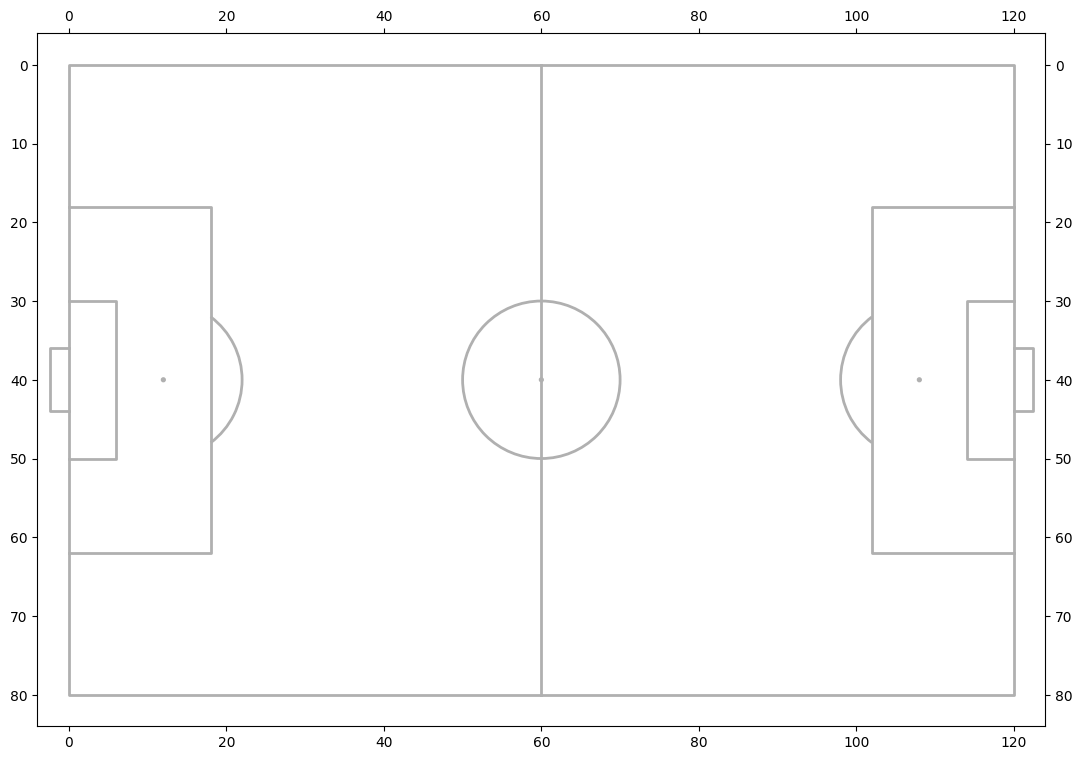

In [6]:
#Ploteamos los toques de Messi dentro de la cancha
fig, ax = plt.subplots(figsize=(16,9))
pitch = Pitch(
    pitch_type= 'statsbomb',
    axis = True,
    label = True,
    tick = True,
    goal_type = 'box'
    )
pitch.draw(ax = ax)

In [7]:
messi.type.value_counts()

type
Ball Receipt*      74
Pass               60
Carry              53
Pressure           17
Ball Recovery       7
Shot                6
Dispossessed        6
Miscontrol          3
Duel                3
Dribble             3
Foul Committed      2
Foul Won            2
Player Off          1
Player On           1
Clearance           1
Injury Stoppage     1
Block               1
Offside             1
Name: count, dtype: int64

In [8]:
#Quiero plotear los pases de Messi
pases_messi = messi[messi['type']=='Pass']
pases_messi.shape

(60, 94)

In [9]:
pases_messi.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure,x,y
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,779,00:02:16.985,Pass,True,76.6,35.7
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,779,00:02:27.185,Pass,NaN,99.3,57.3
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,779,00:03:52.966,Pass,NaN,67.9,59.0
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,779,00:04:26.443,Pass,NaN,81.8,65.2
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,779,00:07:11.325,Pass,NaN,39.2,48.1


In [10]:
pases_messi.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [11]:
pases_messi['location'].apply(pd.Series)

,0,1
36,76.6,35.7
39,99.3,57.3
52,67.9,59.0
62,81.8,65.2
103,39.2,48.1
110,120.0,80.0
112,108.2,74.4
134,80.5,47.8
153,52.5,56.4
157,95.2,48.5


In [12]:
#Las columnas que me interesan para plotear los pases son
#Las locations desde donde empezó el pase y hacia dónde fue
# pases_messi[['location','pass_end_location']]
#Abro en X y en Y a estas listas con pd.Series
pases_messi[['xi','yi']] = pases_messi.location.apply(pd.Series)
# pases_messi[['xi','yi','location']]
pases_messi[['xf','yf']] = pases_messi.pass_end_location.apply(pd.Series)
# pases_messi[['xi','yi','location','xf','yf','pass_end_location']]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9140\2568979141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases_messi[['xi','yi']] = pases_messi.location.apply(pd.Series)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9140\2568979141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases_messi[['xi','yi']] = pases_messi.location.apply(pd.Series)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9140\2568979141.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [13]:
pases_messi.pass_outcome.value_counts()

pass_outcome
Incomplete      10
Pass Offside     1
Name: count, dtype: int64

In [38]:
pases_messi.pass_outcome.fillna('Complete')

36          Complete
39          Complete
52          Complete
62          Complete
103         Complete
110       Incomplete
112         Complete
134         Complete
153         Complete
157       Incomplete
188         Complete
231         Complete
272       Incomplete
281         Complete
295         Complete
297         Complete
299         Complete
344         Complete
365         Complete
378         Complete
410         Complete
469         Complete
493       Incomplete
528         Complete
534         Complete
545         Complete
570       Incomplete
578         Complete
596         Complete
607         Complete
611       Incomplete
654         Complete
695         Complete
717         Complete
721         Complete
770         Complete
786       Incomplete
807         Complete
846         Complete
848         Complete
850         Complete
854         Complete
893         Complete
917       Incomplete
983         Complete
991         Complete
1006      Incomplete
1015        C

In [28]:
pases_incompletos = pases_messi.loc[pases_messi['pass_outcome'] == 'Incomplete']
pases_offside = pases_messi.loc[pases_messi['pass_outcome'] == 'Pass Offside']

In [29]:
pases_offside

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,team_id,timestamp,type,under_pressure,x,y,xi,yi,xf,yf
1262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,779,00:16:59.810,Pass,NaN,74.1,34.6,74.1,34.6,92.2,29.9


In [45]:
pases_completos = pases_messi.loc[pases_messi['pass_outcome'].isnull() == True]
# pases_completos.shape[0]+pases_offside.shape[0]+pases_incompletos.shape[0]-pases_messi.shape[0]

### Ahora podemos Plotear todos los pases de Messi en el partido, distinguiendo según el destino que tuvieron 

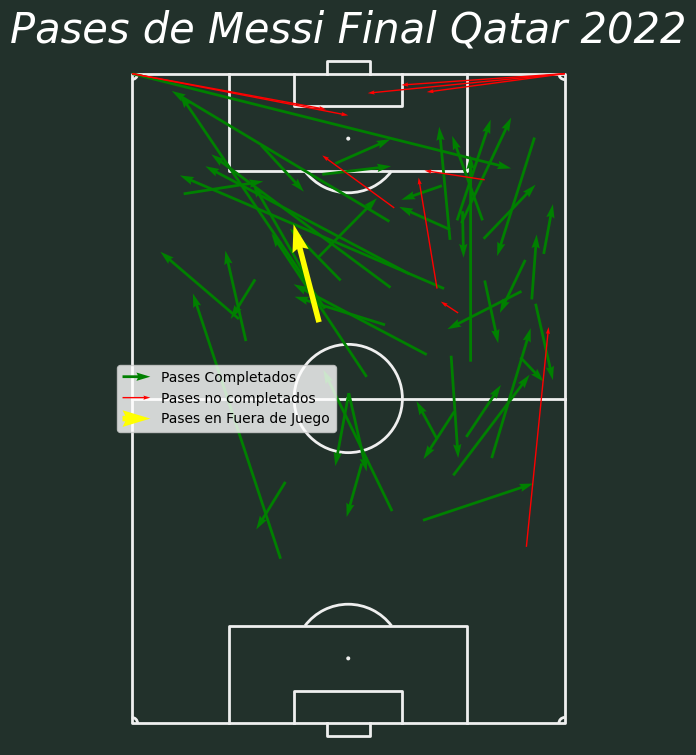

In [128]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(
    pitch_type= 'statsbomb',
    axis = False,
    label = False,
    tick = False,
    goal_type = 'box', 
    linestyle= '-', 
    # pitch_color= 'grass',
    pitch_color='#22312b', line_color='#efefef',
    # stripe = True, 
    # stripe_color= 'Grey',
    corner_arcs= True
    )
pitch.draw(ax = ax)
fig.set_facecolor('#22312b')
pitch.arrows(xstart = pases_completos['xi'], ystart= pases_completos['yi'], xend = pases_completos['xf'], yend=pases_completos['yf'], color = 'green', ax = ax,width = 2, label = 'Pases Completados')
pitch.arrows(xstart = pases_incompletos['xi'], ystart= pases_incompletos['yi'], xend = pases_incompletos['xf'], yend=pases_incompletos['yf'], color = 'red', ax = ax, width = 1, label = 'Pases no completados')
pitch.arrows(xstart = pases_offside['xi'], ystart= pases_offside['yi'], xend = pases_offside['xf'], yend=pases_offside['yf'], color = 'yellow', ax = ax, width = 4, label = 'Pases en Fuera de Juego')

plt.legend();
#Title
plt.title('Pases de Messi Final Qatar 2022', color='white',
                             va='center', ha='center', fontsize = 30, fontfamily = 'Sans-serif',fontstyle=  'italic');
plt.savefig("Pases de Messi Final Qatar 2022", dpi = 300)